In [35]:
import os
from PIL import Image
import numpy as np
import numpy.random as nprandom
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


In [36]:
IMAGE_SIZE = (256, 256)
MICROOBJECT_SIZE = 20
BACKGROUND_MICROOBJECT_SIZE_RANGE = (15, 18)
NUM_BACKGROUND_MICROOBJECTS = 50
MACROOBJECTS = ['R', 'O', 'H', 'A', 'N']
FONT_PATH = "arial.ttf"
OUTPUT_DIR = "/kaggle/input/rohands3/dataset"

In [37]:
def load_dataset(output_dir, macroobjects, image_size):
    X = []
    y = []
    label_map = {label: idx for idx, label in enumerate(macroobjects)}
    for label in macroobjects:
        class_dir = os.path.join(output_dir, label)
        for filename in os.listdir(class_dir):
            if filename.endswith('.png'):
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path).convert('L')
                img = img.resize(image_size)
                img_array = np.array(img)
                X.append(img_array)
                y.append(label_map[label])
    X = np.array(X)
    y = np.array(y)
    return X, y

X, y = load_dataset(OUTPUT_DIR, MACROOBJECTS, IMAGE_SIZE)

In [38]:
X = X / 255.0
X = X.reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 1)

y = to_categorical(y, num_classes=len(MACROOBJECTS))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 4000
Testing samples: 1000


In [39]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

model = create_cnn_model((IMAGE_SIZE[0], IMAGE_SIZE[1], 1), len(MACROOBJECTS))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,587,333 (112.87 MB)

 Trainable params: 29,586,373 (112.86 MB)

 Non-trainable params: 960 (3.75 KB)

In [40]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - accuracy: 0.5660 - loss: 1.4993 - val_accuracy: 0.2000 - val_loss: 53.8333
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.9628 - loss: 0.1197 - val_accuracy: 0.2070 - val_loss: 10.5533
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9972 - loss: 0.0289 - val_accuracy: 0.2290 - val_loss: 7.8272
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.3730 - val_loss: 4.7622
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.5250 - val_loss: 2.1445
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.6810 - val_loss: 0.9413
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8230 - val_loss: 0.5165
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy:

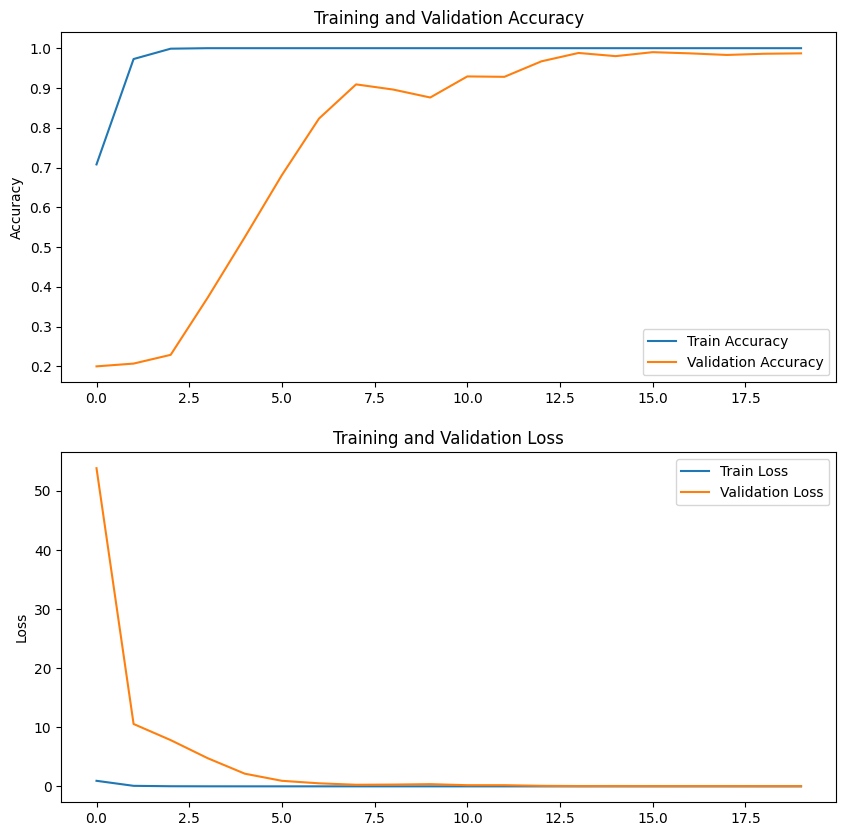

In [41]:
def plot_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot accuracy
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].legend()
    
    # Plot loss
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].legend()
    
    plt.show()

plot_history(history)

In [42]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")


32/32 - 1s - 30ms/step - accuracy: 0.9870 - loss: 0.0495
Test Accuracy: 98.70%
